In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

from keras.utils import to_categorical
from keras.initializers import glorot_uniform

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('c:\\Users\\Vladislav.Klochkov\\Desktop\\train.csv')
data.shape

(42000, 785)

In [3]:
train = data[:39000]
dev = data[39000:]
train.shape, dev.shape

((39000, 785), (3000, 785))

In [4]:
train = train.as_matrix()
dev = dev.as_matrix()
train.shape, dev.shape

C:\Users\Vladislav.Klochkov\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Vladislav.Klochkov\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((39000, 785), (3000, 785))

In [5]:
def give_data(set):
    Y = set[:,0]
    Y = to_categorical(Y, num_classes=10)
    X = set[:,1:].reshape((set.shape[0],28,28,1))/255.
    return X,Y

In [6]:
X_dev, Y_dev = give_data(dev)
X_dev.shape, Y_dev.shape

((3000, 28, 28, 1), (3000, 10))

In [7]:
X_train, Y_train = give_data(train)
X_train.shape, Y_train.shape

((39000, 28, 28, 1), (39000, 10))

In [8]:
def LeNet5(input_shape = (28,28,1), classes = 10):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((1,1))(X_input)
    X = Conv2D(8, (3,3), name='Conv1')(X)
    X = BatchNormalization(axis=3, name='BatchNorm1')(X)
    X = MaxPooling2D(strides=(2,2), name='MaxPool1')(X)
    X = Conv2D(16, (5,5), name='Conv2')(X) 
    X = MaxPooling2D(strides=(2,2), name='MaxPool2')(X)
    X = Flatten()(X)
    X = Dense(120, activation='relu', name='fc1')(X)
    X = Dense(84 , activation='relu', name='fc2')(X)
    
    X = Dense(classes, activation='softmax', name='final_layer')(X)
    
    model = Model(inputs=X_input, outputs=X, name='LeNet5')
    
    return model


In [9]:
model = LeNet5()

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [11]:
track = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data=(X_dev, Y_dev))

Train on 39000 samples, validate on 3000 samples
Epoch 1/30
39000/39000 [==============================] - 31s 804us/step - loss: 0.2254 - acc: 0.9304 - val_loss: 0.1180 - val_acc: 0.9687
Epoch 2/30
39000/39000 [==============================] - 31s 791us/step - loss: 0.0711 - acc: 0.9777 - val_loss: 0.0662 - val_acc: 0.9787
Epoch 3/30
39000/39000 [==============================] - 31s 803us/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.0581 - val_acc: 0.9830
Epoch 4/30
39000/39000 [==============================] - 31s 795us/step - loss: 0.0356 - acc: 0.9880 - val_loss: 0.0573 - val_acc: 0.9793
Epoch 5/30
39000/39000 [==============================] - 29s 750us/step - loss: 0.0279 - acc: 0.9903 - val_loss: 0.0735 - val_acc: 0.9817
Epoch 6/30
39000/39000 [==============================] - 29s 747us/step - loss: 0.0229 - acc: 0.9922 - val_loss: 0.0931 - val_acc: 0.9763
Epoch 7/30
39000/39000 [==============================] - 29s 749us/step - loss: 0.0220 - acc: 0.9923 - val_loss: 0.0

In [12]:
loss = track.history["loss"]
acc = track.history["acc"]
ep = list(range(len(loss)))

Text(0,0.5,'loss')

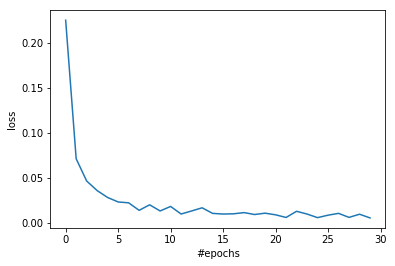

In [13]:
plt.plot(ep, loss)
plt.xlabel("#epochs")
plt.ylabel("loss")

Text(0,0.5,'accuracy')

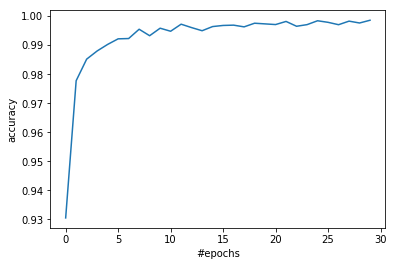

In [14]:
plt.plot(ep, acc)
plt.xlabel("#epochs")
plt.ylabel("accuracy")

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 8)         80        
_________________________________________________________________
BatchNorm1 (BatchNormalizati (None, 28, 28, 8)         32        
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 8)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 10, 10, 16)        3216      
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 5, 5, 16)          0         
__________

In [16]:
test = pd.read_csv("c:\\Users\\Vladislav.Klochkov\\Desktop\\test.csv")
test = test.as_matrix()
test.shape

C:\Users\Vladislav.Klochkov\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(28000, 784)

In [17]:
X_test = test.reshape((28000,28,28,1))
X_test.shape

(28000, 28, 28, 1)

In [18]:
pred = model.predict(X_test)
pred.shape

(28000, 10)

In [19]:
res = pred.argmax(axis=1)
res.shape

(28000,)

Prediction : 9


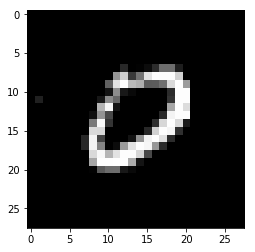

In [21]:
index = 3
print("Prediction :", res[index])
plt.imshow(X_test[index].reshape((28,28)), cmap="gray")

In [160]:
import cv2

In [138]:
arr = cv2.imread('02.png', 2)
test_1 = arr.reshape((1,28,28,1))
pred = model.predict(test_1)
res = pred.argmax(axis=1)
res[0]

3

In [99]:
def write_to_submission_file(predicted_labels, out_file, train_num=0,
                    target='Label', index_label="ImageId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels, 
                                index = np.arange(train_num + 1, train_num + 1 + predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [100]:
write_to_submission_file(res, out_file='c:\\Users\\Vladislav.Klochkov\\Desktop\\submission.csv')

In [101]:
res

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)